In [1]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import pymc3 as pm
import pandas as pd

from scipy import stats

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [14]:
az.style.use("arviz-darkgrid")
print("Running PyMC3 version {}".format(pm.__version__))
print("Running Arviz version {}".format(az.__version__))

Running PyMC3 version 3.9.3
Running Arviz version 0.10.0


In [13]:
with pm.Model():
    mu = pm.Normal("mu", 0, 1)
mu.logp({"mu": 0})

array(-0.91893853)

In [7]:
model.basic_RVs

[mu, obs]

In [8]:
model.free_RVs

[mu]

In [9]:
model.observed_RVs

[obs]

In [18]:
with pm.Model() as model:
    x = pm.Uniform("x", lower=0, upper=1)
model.free_RVs

[x_interval__]

In [24]:
import pymc3.distributions.transforms as tr
import theano.tensor as tt

with pm.Model() as model:
    x1 = pm.Gamma("x1", alpha=1, beta=1)
    x2 = pm.Gamma("x2", alpha=1, beta=1, transform=tr.log_exp_m1)
print("The default transformation of x1: " + x1.transformation.name)
print("The user specfied transformation of x2: " + x2.transformation.name)
model.free_RVs

The default transformation of x1: log
The user specfied transformation of x2: log_exp_m1


[x1_log__, x2_log_exp_m1__]

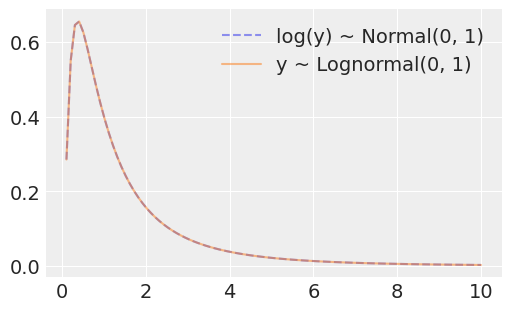

In [30]:
class Exp(tr.ElemwiseTransform):
    name = "exp"
    
    def backward(self, x):
        return tt.log(x)
    
    def forward(self, x):
        return tt.exp(x)
    
    def jacobian_det(self, x):
        return -tt.log(x)
    
with pm.Model() as model:
    x1 = pm.Normal("x1", 0, 1, transform=Exp())
    x2 = pm.Lognormal("x2", 0, 1)
    
lognorm1 = model.named_vars["x1_exp__"]
lognorm2 = model.named_vars["x2"]

_, ax = plt.subplots(1, 1, figsize=(5, 3))
x = np.linspace(0, 10, 100)
ax.plot(x, np.exp(lognorm1.distribution.logp(x).eval()), "--", alpha=0.5, label="log(y) ~ Normal(0, 1)")
ax.plot(x, np.exp(lognorm2.distribution.logp(x).eval()), alpha=0.5, label="y ~ Lognormal(0, 1)")
plt.legend();

In [37]:
with pm.Model() as model:
    mu = pm.Normal("mu", 0, 1)
    obs = pm.Normal("obs", mu=mu, sigma=1, observed=np.random.randn(100))
    idata = pm.sample(2000, chains=6, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (6 chains in 4 jobs)
NUTS: [mu]


Sampling 6 chains for 1_000 tune and 2_000 draw iterations (6_000 + 12_000 draws total) took 3 seconds.


In [38]:
idata.posterior.dims

Frozen(SortedKeysDict({'chain': 6, 'draw': 2000}))

In [36]:
idata.posterior["mu"].shape

(4, 2000)

In [44]:
list(filter(lambda x: x[0].isupper(), dir(pm.step_methods)))

['BinaryGibbsMetropolis',
 'BinaryMetropolis',
 'CategoricalGibbsMetropolis',
 'CauchyProposal',
 'CompoundStep',
 'DEMetropolis',
 'DEMetropolisZ',
 'ElemwiseCategorical',
 'EllipticalSlice',
 'HamiltonianMC',
 'LaplaceProposal',
 'Metropolis',
 'MultivariateNormalProposal',
 'NUTS',
 'NormalProposal',
 'PoissonProposal',
 'Slice']

array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>]], dtype=object)

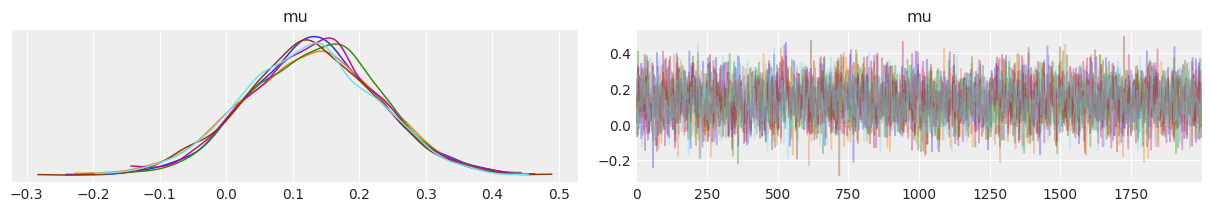

In [45]:
az.plot_trace(idata)

In [46]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,0.129,0.1,-0.07,0.306,0.002,0.001,4404.0,4404.0,4394.0,7648.0,1.0


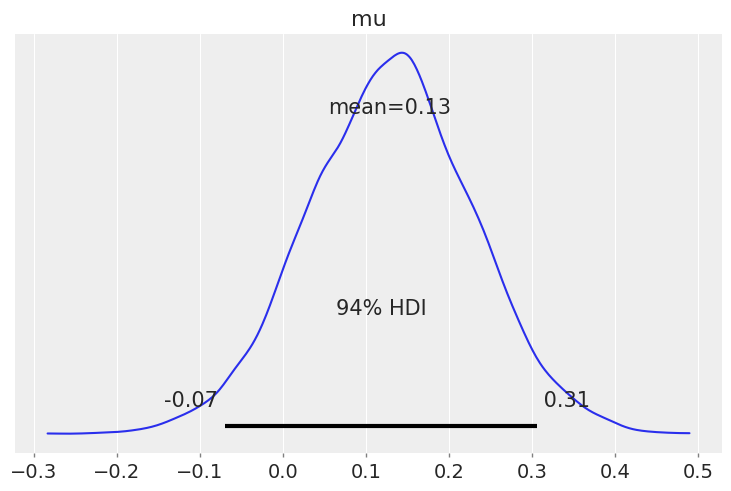

In [49]:
az.plot_posterior(idata);

In [50]:
with pm.Model() as model:
    mu = pm.Normal("mu", 0, 1)
    sd = pm.HalfNormal("sd", sigma=1)
    obs = pm.Normal("obs", mu=mu, sigma=sd, observed=np.random.randn(100))    
    approx = pm.fit()

Finished [100%]: Average Loss = 150.96


In [51]:
approx.sample(500)

<MultiTrace: 1 chains, 500 iterations, 3 variables>

In [54]:
%load_ext watermark
%watermark -n -u -v -iv -w

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: Mon Feb 15 2021

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.18.1

pymc3     : 3.9.3
arviz     : 0.10.0
theano    : 1.0.5
numpy     : 1.19.1
scipy     : 1.5.2
matplotlib: 3.3.1
pandas    : 1.1.1

Watermark: 2.1.0

